## INDICE
* [Inicialización de parámetros](#inicializacion)
* [Función de Activación](#activacion)
* [EJERCICIOS](#ejercicios)

## Redes Neuronales:<a class="anchor" id="redes"></a>

Ejemplo simpre con 5 neuronas, 1, 3, 1

formulas:
<pre>
y1=x
y2=w2 y1 + b2
y3=w3 y1 + b3
y4=w4 y1 + b4
y5=w5,2 y2 + w5,3 y3 + w5,4 y4 + b5
</pre>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import warnings

warnings.filterwarnings('ignore')   #No muestra los "Warning"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


iris=load_iris()
x=iris.data[0:100,2]
y=iris.target[0:100]
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(3, input_dim=1,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='mean_squared_error')

model.fit(x, y,epochs=100, verbose=False)

2022-12-14 17:05:27.278239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 17:05:27.766436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 17:05:27.766479: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 17:05:28.997458: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
#############################################
##   para utilizar plot_model, tenemos que:
##      pip install pydot
##      sudo apt get install graphviz

from tensorflow.keras.utils import plot_model
 
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [4]:
def get_w(model,layer,neuron,index):
    '''get_w: Obtiene el weight de una neurona. Los argumentos son:
        model: El modelo de red neuronal sobre el que se van a obtener los weight
        layer: El Nº de la capa en la que se encuentra la neurona
        neuron: El Nº de la neurona dentro de la capa. Se empieza por 0
        index: Dentro de la neurona puede haber varios weight, así que este argumento indica cual de todos ellos retornará.Empieza por 0.'''
    layer=model.layers[layer]
    return layer.get_weights()[0][index,neuron]
  


def get_b(model,layer,neuron):
    '''get_b: Obtiene el bias de una neurona. Los argumentos son:
        model: El modelo de red neuronal sobre el que se van a obtener los bias
        layer: El Nº de la capa en la que se encuentra la neurona
        neuron: El Nº de la neurona dentro de la capa. Se empieza por 0'''  
    layer=model.layers[layer]
    return layer.get_weights()[1][neuron]
 
 
w_2 =get_w(model,0,0,0)
w_3 =get_w(model,0,1,0)
w_4 =get_w(model,0,2,0)
w_52=get_w(model,1,0,0)
w_53=get_w(model,1,0,1)
w_54=get_w(model,1,0,2)
b_2 =get_b(model,0,0)
b_3 =get_b(model,0,1)
b_4 =get_b(model,0,2)
b_5 =get_b(model,1,0)

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
 
def predict_formula(x):
    part1=w_52*sigmoid(w_2*x+b_2)
    part2=w_53*sigmoid(w_3*x+b_3)
    part3=w_54*sigmoid(w_4*x+b_4)
    part4=b_5
    z=part1+part2+part3+part4
 
    return sigmoid(z)

In [6]:
y_predicho_red_neuronal=model.predict([x])
y_predicho_formula=predict_formula(x)

np.column_stack((y_predicho_red_neuronal,y_predicho_formula))

array([[0.48605138, 0.48605141],
       [0.48605138, 0.48605141],
       [0.48129171, 0.48129171],
       [0.49077564, 0.49077566],
       [0.48605138, 0.48605141],
       [0.50009888, 0.50009888],
       [0.48605138, 0.48605141],
       [0.49077564, 0.49077566],
       [0.48605138, 0.48605141],
       [0.49077564, 0.49077566],
       [0.49077564, 0.49077566],
       [0.49545968, 0.49545967],
       [0.48605138, 0.48605141],
       [0.47168615, 0.47168615],
       [0.47650155, 0.47650156],
       [0.49077564, 0.49077566],
       [0.48129171, 0.48129171],
       [0.48605138, 0.48605141],
       [0.50009888, 0.50009888],
       [0.49077564, 0.49077566],
       [0.50009888, 0.50009888],
       [0.49077564, 0.49077566],
       [0.46685079, 0.46685079],
       [0.50009888, 0.50009888],
       [0.5092259 , 0.50922593],
       [0.49545968, 0.49545967],
       [0.49545968, 0.49545967],
       [0.49077564, 0.49077566],
       [0.48605138, 0.48605141],
       [0.49545968, 0.49545967],
       [0.

## Inicialización de parámetros:<a class="anchor" id="inicializacion"></a>

<pre>
Cuando se define la red neuronal con compile, Keras genera valores aleatorios para los parámetros
y luego con el método fit se entrena la red neuronal para averiguar los valores mas adecuados.

En ciertos casos es necesario definir exactamente cual es la forma de inicializar los parámetros.

En keras al crear una capa podemos indicar como se inicializan los pesos (weights)
y como se inicializan los sesgos (bias), para ello están los siguientes parámetros:

model=Sequential()
model.add(Dense(3, input_dim=1,kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model.add(Dense(1))
model.compile()
</pre>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

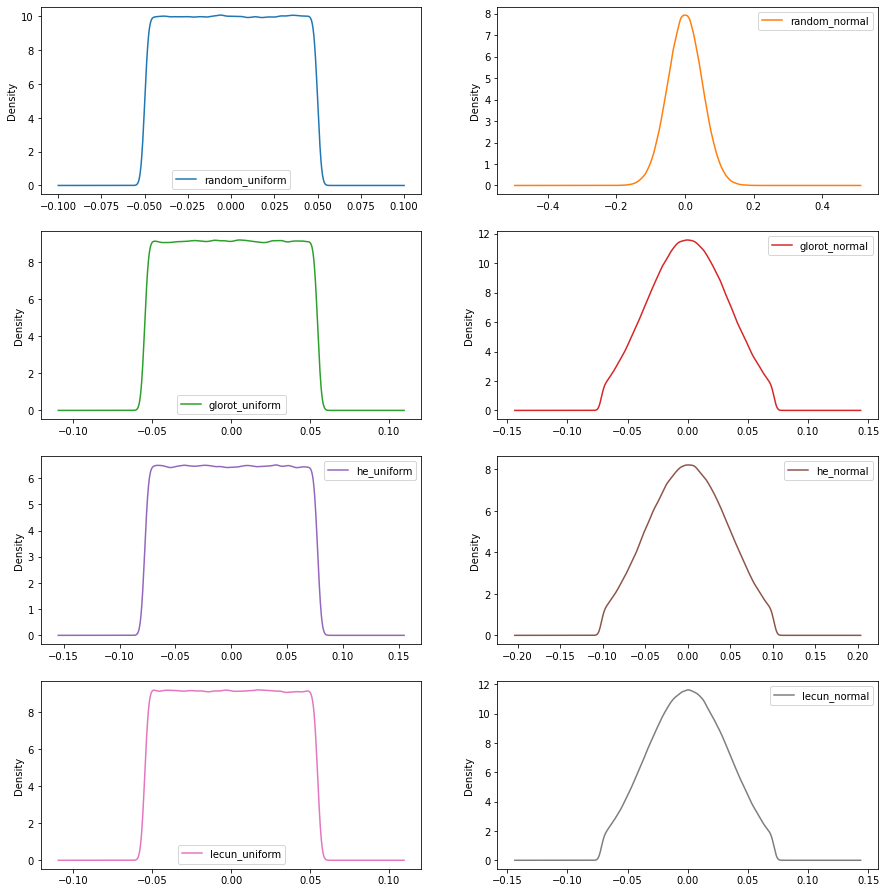

In [7]:
import tensorflow as tf
import tensorflow.python.keras as keras    #import keras as keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
 
initializers=["random_uniform","random_normal","glorot_uniform","glorot_normal","he_uniform","he_normal","lecun_uniform","lecun_normal","zeros","ones"]
model=Sequential()
for initializer in initializers:
    model.add(Dense(1000, input_dim=1000,kernel_initializer=initializer))
model.add(Dense(1000))
model.compile()
 
df=pd.DataFrame()
for index,initializer in enumerate(initializers):
    pesos=(model.layers[index].get_weights()[0]).reshape(-1)
    df[initializer]=pesos
 
df.describe()
 
df.iloc[:,0:8].plot(kind = 'density', subplots = True,  layout = (5,2),figsize=(15,20),sharex = False)

## Función ACTIVACIÓN:<a class="anchor" id="activacion"></a>

<pre>
Distintas formas de usarlas en Keras:
como ejemplo, función de activación llamada "ReLU":
    Usando un String con el nombre de la función de activación
	"relu"
	    model.add(Dense(3, input_dim=1,activation="relu"))
    
    Usando una función de activación
	tf.keras.activations.relu
	    model.add(Dense(3, input_dim=1,activation=tf.keras.activations.relu))
    
    Usando una capa de activación.
	tf.keras.layers.ReLU()
	    model.add(Dense(3, input_dim=1,activation=tf.keras.layers.ReLU()))
	    Se puede hacer lo mismo en una nueva capa:
        	model.add(Dense(3, input_dim=1))
	    	model.add(tf.keras.layers.ReLU())
</pre>

### Funciones de activación en capas ocultas:
*    **Sigmoide** y Tangente Hiperbólica (**tanh**)
*    Rectified Linear Unit (**ReLU**) y **Leaky ReLU**
*    Exponential Linear Unit (**ELU**) y Scaled Exponential Linear Unit (**SELU**)
<pre>
    Recomendaciones:
	Deberíamos empezar siempre probando con ReLU y Leaky ReLU,
        ya que son las más rápidas y en general funcionan bien.
        Si ReLU y Leaky ReLU no dan un resultado lo suficientemente bueno, probar con SELU o ELU.
        El último lugar probar con GELU.
        Nunca deberíamos usar ni Sigmoide ni Tanh a menos que no nos quede mas remedio.
</pre>

### Funciones de activación en la capa de salida:
*    Linear
*    Sigmoide
*    Softmax

<pre>
 Los problemas que resuelven las redes neuronales se suelen clasificar en:
	Problemas de regresión: En los que se calcula un número.
	Problemas de clasificación: En lo que hay que clasificar los datos entrada.

    Problemas de regresión
        Linear
    Problemas de clasificación
        Sigmoide
        Softmax

    IMPORTANTE SABER CUÁNDO USAR SOFTMAX O SIGMOIDE.
        Sigmoide. La salida de cada neurona es una probabilidad entre 0 y 1.
        Softmax. En vez de aplicarse a una única neurona se aplica a todas las neuronas de una capa.
                 Es similar a la sigmoide pero lo que hace es que la probabilidad
                 de todas las salidas de la capa debe sumar 1.
</pre>

In [8]:
##########################################################
#######         CLASIFICACIÓN FLORES IRIS        #########
###Todas las flores (los tres tipos distintos de iris):###
##########################################################


import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import np_utils
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LightSource
import warnings

warnings.filterwarnings('ignore')   #No muestra los "Warning"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

iris=load_iris()

 
x=iris.data[:]
y=iris.target[:]

# codificacion en caliente ( hot encoded)
Y = np_utils.to_categorical(y)      #convertimos el vector en una matriz.
 
 
np.random.seed(5)
tf.random.set_seed(5)
 
 
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=4))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))    #cambiar por sigmoid y ver las diferencias ;-)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
 
 
model.fit(x, Y,epochs=200,verbose=0) 

def muestra_resultado(c):
    print('Setosa\t\tVersicolor\tVirginica')
    for i in c[0]:
        print("%.7f"%i, end='\t')
    print("\n",end='\n')

muestra_resultado(model.predict([[5.1, 3.5, 1.4, 0.2]]))    #'Iris-setosa'
muestra_resultado(model.predict([[5.7, 2.8, 4.5, 1.3]]))    #'Iris-versicolor'
muestra_resultado(model.predict([[7.7, 3.0, 6.1, 2.3]]))    #'Iris-virginica'

Setosa		Versicolor	Virginica
0.9976151	0.0023849	0.0000000	

Setosa		Versicolor	Virginica
0.0003842	0.8948531	0.1047627	

Setosa		Versicolor	Virginica
0.0000001	0.0030482	0.9969517	



In [9]:
from tensorflow.keras.utils import plot_model
 
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Usando funciones de activación en Keras

In [10]:
#Crear nuestra propia función de activación:
from tensorflow.keras import backend as K
 
def my_relu(x):
    return K.maximum(0.3*x, x)

In [11]:
#Usarla de las siguientes formas:
model.add(Dense(3, input_dim=1,activation=my_relu))


model.add(Dense(3, input_dim=1))
model.add(Dense(3, input_dim=1,activation=tf.keras.layers.Activation(my_relu)))


model.add(Dense(3, input_dim=1))
model.add(Dense(3, input_dim=1,activation=tf.keras.layers.Lambda(my_relu)))

In [12]:
#Función parametrizada:
from tensorflow.keras import backend as K
 
def my_relu(x,alpha):
    return K.maximum(alpha*x, x)


model.add(Dense(3, input_dim=1))
model.add(tf.keras.layers.Lambda(lambda x: my_relu(x,0.3)))

In [13]:
#Funciones con nombre:
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
 
def my_relu(x,alpha):
    return K.maximum(alpha*x, x)


get_custom_objects()['relu_0_3']=tf.keras.layers.Lambda(lambda x: my_relu(x,0.3))


model.add(Dense(3, input_dim=1,activation="relu_0_3"))

ValueError: Unknown activation function: relu_0_3. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
#Tipos de funciones de activación en capas ocultas
#ReLu y Leaky ReLU
'''La función de activación tf.keras.activations.relu tiene un parámetro llamado alpha
   que hace que comporte como la función Leaky ReLU.
   Y también la capa tf.keras.layers.ReLU() tiene el mismo parámetro pero llamado negative_slope
   y obviamente hace exactamente lo mismo. Por lo tanto es igual a Leaky ReLU.
'''
model.add(Dense(3, input_dim=1,activation=tf.keras.layers.ReLU(negative_slope=0.3)))
model.add(Dense(3, input_dim=1,activation=tf.keras.layers.Lambda(lambda x: tf.keras.activations.relu(x,alpha=0.3))))


In [ ]:
#Con el siguiente código podemos ver el resultado:

import tensorflow as tf
import warnings

class_relu=tf.keras.layers.ReLU(negative_slope=0.3)
class_leaky_relu=tf.keras.layers.LeakyReLU()
 
x=np.linspace(-5,5,500)
y_class_relu=class_relu(x)
y_relu=tf.keras.activations.relu(x, alpha=0.3).numpy()
y_class_leaky_relu=class_leaky_relu(x)
 
 
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)
np.column_stack((y_relu,y_class_leaky_relu,y_class_relu,y_relu-y_class_leaky_relu,y_class_relu-y_class_leaky_relu))

array([[-1.50000006, -1.5       , -1.5       ,  0.        ,  0.        ],
       [-1.49398804, -1.49398804, -1.49398804,  0.        ,  0.        ],
       [-1.48797601, -1.48797607, -1.48797607,  0.00000012,  0.        ],
       [-1.48196399, -1.48196399, -1.48196399,  0.        ,  0.        ],
       [-1.47595196, -1.47595203, -1.47595203,  0.00000012,  0.        ],
       [-1.46993994, -1.46993995, -1.46993995,  0.        ,  0.        ],
       [-1.46392791, -1.46392787, -1.46392787,  0.        ,  0.        ],
       [-1.45791589, -1.45791578, -1.45791578, -0.00000012,  0.        ],
       [-1.45190387, -1.45190382, -1.45190382,  0.        ,  0.        ],
       [-1.44589184, -1.44589186, -1.44589186,  0.        ,  0.        ],
       [-1.43987982, -1.43987978, -1.43987978,  0.        ,  0.        ],
       [-1.43386779, -1.43386781, -1.43386781,  0.        ,  0.        ],
       [-1.42785577, -1.42785573, -1.42785573,  0.        ,  0.        ],
       [-1.42184374, -1.42184377, -1.4

#### Tipos de funciones de activación en capas ocultas
**PReLU**
<p>Similar a Leaky ReLU pero el valor de α se calcula automáticamente durante el entrenamiento, es decir que es como un parámetro mas de la red.  <a href="https://www.machinecurve.com/index.php/2019/12/05/how-to-use-prelu-with-keras/">How to use PReLU with Keras?</a>
<p>

**GELU**
<p>Es de la últimas funciones de activación "famosas" que han aparecido. GELU: Se usa con Transformers. La usa Google con BERT y OpenAI en GPT-2 y GPT-3.
<a href="https://mlfromscratch.com/activation-functions-explained/#/"><-enlace-></a>
<pre>
model.add(Dense(3, input_dim=1,activation=tf.keras.activations.gelu))
model.add(Dense(3, input_dim=1,activation="gelu"))
</pre>

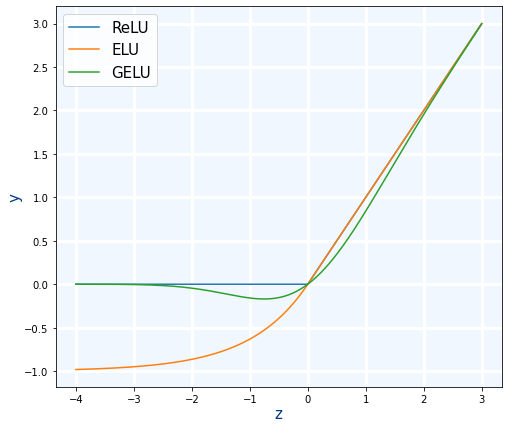


<p>

**Swish**
<p>Se usa cuando ReLU, es un poco más lenta, pero es mejor.</p>

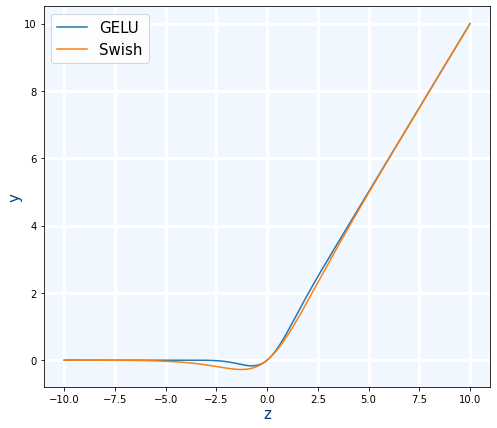


<p>

**Mish**
<p>Se usa cuando ReLU, aunque es un poco más lenta es mejor. Es muy similar a Swish</p>

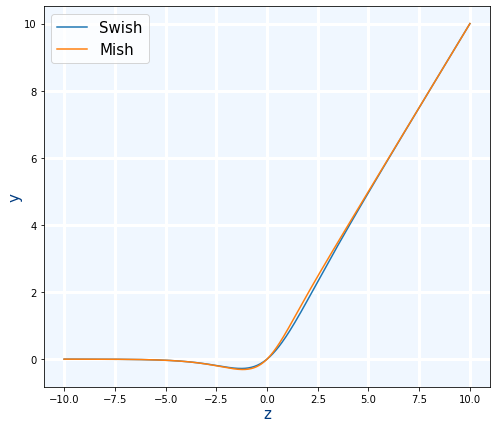

*    <a href="https://www.tensorflow.org/addons/api_docs/python/tfa/activations/mish">tfa.activations.mish(x)</a>
*    <a href="https://towardsdatascience.com/activation-functions-you-might-have-missed-79d72fc080a5">Activation functions you might have missed</a>
*    <a href="https://arxiv.org/pdf/1908.08681.pdf">Mish: A Self Regularized Non-Monotonic Activation Function: Paper original de Mish</a>
<p>

**Poetry**
<p> Para usar Mish deberemos instalar <a href="https://www.tensorflow.org/addons/overview">TensorFlow Addons</a>. Desde conda a veces falla la instalación así que lo recomendable es usar <a href="https://python-poetry.org/">Poetry</a></p>

Para usar poetry debemos primero instalarlo en el sistema operativo mediante los comandos:
*    pip install --user poetry
*    poetry config virtualenvs.in-project true

Una vez instalado (se puede comprobar con poetry --version) iremos a la carpeta donde tenemos nuestro programa en Python (o donde lo vamos a tener) y ejecutaremos lo siguiente:
*   poetry init
*   poetry add libclang = "<12.0.0" numpy pandas matplotlib seaborn scikit-learn tensorflow tabulate PyMySQL SQLAlchemy ipympl keras-tuner tensorflow-addons
*   poetry install

<p>

Para ejecutar el código hay 2 formas:
*    Desde la línea de comandos:
        *   poetry run python my_script.py
*    Desde VS Code seleccionar en los entornos de ejecución la carpeta .venv del propio proyecto:

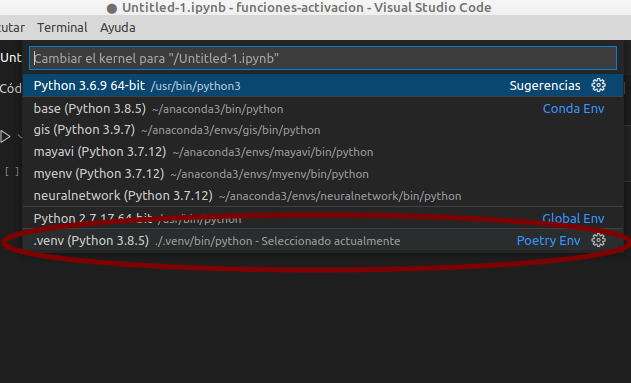

## EJERCICIOS:<a class="anchor" id="ejercicios"></a>

### 1.-
Dada la siguiente red neuronal:

<center>

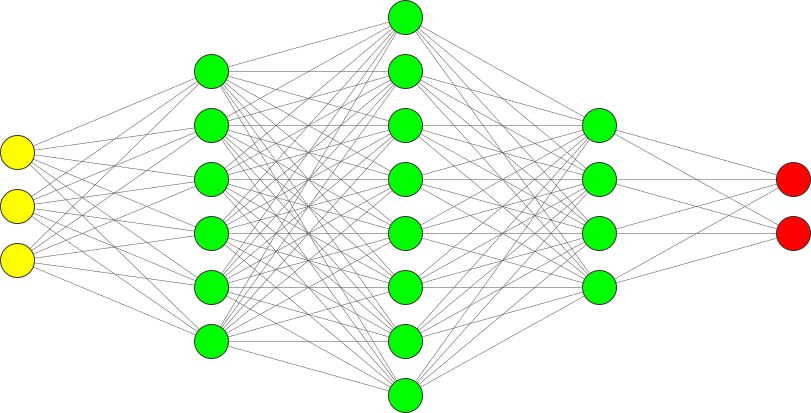

</center>

<pre>
    Indica el Nª de capas
        Entrada
        Salida
        Ocultas
    Para cada capa
        Indica el nº parámetros
        Indica en nº de entradas
        Indica en nº de salidas
    Para toda la red
        Indica el nº parámetros
        Indica en nº de entradas
        Indica en nº de salidas
    Crea el código en Keras de la red neuronal.
    Muestra el resumen de la red en Keras y comprueba que coincide con lo calculado
    Muestra el grafico de la red en Keras y comprueba que coincide con lo calculado
</pre>

In [ ]:
import tensorflow as tf
import tensorflow.python.keras as keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import Dense


np.random.seed(5)
tf.random.set_seed(5)
 
 
ej1=Sequential()
ej1.add(Dense(6, activation='relu',input_dim=3))
ej1.add(Dense(8, activation='relu'))
ej1.add(Dense(4, activation='relu'))
ej1.add(Dense(2, activation='softmax'))    #cambiar por sigmoid y ver las diferencias ;-)
ej1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

ej1.summary()
 

In [23]:

!pip install graphviz

In [24]:
import pydot 
import graphviz
plot_model(ej1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 2.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación tangente hiperbólica indicando la función de activación como un string
    Usen la función de activación tangente hiperbólica indicando la función de activación como una función de python

Indica además que inicializador usarías con ella


In [28]:
import os
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
warnings.filterwarnings('ignore')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {'0', '1', '2'}
                                         #  0 = all messages are logged (default behavior)
                                         #  1 = INFO messages are not printed
                                         #  2 = INFO and WARNING messages are not printed
                                         #  3 = INFO, WARNING, and ERROR messages are not printed


iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
### CON STRING ###
np.random.seed(5)
tf.random.set_seed(5)
 

model=Sequential()
model.add(Dense(4, activation='tanh',input_dim=2))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40) 


### CON FUNCION ###
np.random.seed(5)
tf.random.set_seed(5)


model2=Sequential()
model2.add(Dense(4, activation=tf.keras.activations.tanh,input_dim=2))
model2.add(Dense(8, activation=tf.keras.activations.tanh))
model2.add(Dense(4, activation=tf.keras.activations.tanh))
model2.add(Dense(1, activation=tf.keras.activations.tanh))
model2.compile(loss='mean_squared_error')

model2.fit(x, y,epochs=40) 

 
print(model.predict([[4.9,1.4]]))
print(model.predict([[6.3,4.9]]))
print(model2.predict([[4.9,1.4]]))
print(model2.predict([[6.3,4.9]]))

Epoch 1/40
4/4 [==============================] - 0s 1ms/step - loss: 1.7383
Epoch 2/40
4/4 [==============================] - 0s 1ms/step - loss: 1.4459
Epoch 3/40
4/4 [==============================] - 0s 1ms/step - loss: 1.2555
Epoch 4/40
4/4 [==============================] - 0s 2ms/step - loss: 1.0321
Epoch 5/40
4/4 [==============================] - 0s 1ms/step - loss: 0.8263
Epoch 6/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6648
Epoch 7/40
4/4 [==============================] - 0s 1ms/step - loss: 0.5771
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 0.4995
Epoch 9/40
4/4 [==============================] - 0s 1ms/step - loss: 0.4462
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.3978
Epoch 12/40
4/4 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 13/40
4/4 [==============================] - 0s 2ms/step - loss: 0.

## 3.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación ReLU indicando la función de activación como un string
    Usen la función de activación ReLU indicando la función de activación como una función de python
    Usen la función de activación ReLU indicando la función de activación como una clase de python

Indica además que inicializador usarías con ella



In [29]:
import os
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 
warnings.filterwarnings('ignore')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {'0', '1', '2'}
                                         #  0 = all messages are logged (default behavior)
                                         #  1 = INFO messages are not printed
                                         #  2 = INFO and WARNING messages are not printed
                                         #  3 = INFO, WARNING, and ERROR messages are not printed


iris=load_iris()
 
sepal_length=iris.data[0:100,0]
petal_length=iris.data[0:100,2]
flower_type=iris.target[0:100]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
### CON STRING ###
np.random.seed(5)
tf.random.set_seed(5)
 

model=Sequential()
model.add(Dense(4, activation='relu',input_dim=2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40) 


### CON FUNCION ###
np.random.seed(5)
tf.random.set_seed(5)


model2=Sequential()
model2.add(Dense(4, activation=tf.keras.activations.relu,input_dim=2))
model2.add(Dense(8, activation=tf.keras.activations.relu))
model2.add(Dense(4, activation=tf.keras.activations.relu))
model2.add(Dense(1, activation=tf.keras.activations.relu))
model2.compile(loss='mean_squared_error')

model2.fit(x, y,epochs=40) 

 
print(model.predict([[4.9,1.4]]))
print(model.predict([[6.3,4.9]]))
print(model2.predict([[4.9,1.4]]))
print(model2.predict([[6.3,4.9]]))

Epoch 1/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 2/40
4/4 [==============================] - 0s 1ms/step - loss: 0.5000
Epoch 3/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 4/40
4/4 [==============================] - 0s 1ms/step - loss: 0.5000
Epoch 5/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 6/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 9/40
4/4 [==============================] - 0s 1ms/step - loss: 0.5000
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 12/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5000
Epoch 13/40
4/4 [==============================] - 0s 1ms/step - loss: 0.

## 4.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación LeakyReLU indicando la función de activación como un string (No se puede)
    Usen la función de activación LeakyReLU indicando la función de activación como una función de python (No se puede)
    Usen la función de activación LeakyReLU indicando la función de activación como una clase de python
    Usen la función de activación LeakyReLU con un valor de α=0.03 indicando la función de activación como una clase de python

Indica además que inicializador usarías con ella


## 5.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación SELU indicando la función de activación como un string
    Usen la función de activación SELU indicando la función de activación como una función de python

Indica además que inicializador usarías con ella



## 6.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación ELU con un valor de α=0.2

Indica además que inicializador usarías con ella



## 7.-

Con los datos de las flores y la configuración de neuronas [2,4,8,4,1] crea varias redes neuronales cuyas capas ocultas:

    Usen la función de activación Swish indicando la función de activación como un string
    Usen la función de activación Swish indicando la función de activación como una función de python

Indica además que inicializador usarías con ella
